In [1]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [2]:
%pylab inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


In [3]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [4]:
col_name = ['age',
            'sex',
             'cp',
             'chol',
             'trestbps',
             'fbs',
             'restecg',
             'thalach',
             'exang',
             'olddek',
             'slope',
             'ca',
             'thal',
             'num'
    
]

In [151]:
df = pd.read_csv(filename,
                index_col = None,
                header = None,
                names = col_name,
                na_values = '?')

In [152]:
#df = df.rename(columns = col_rename)
df.shape # 303 by 14 columns

(303, 14)

In [153]:
# Which are the rows with missing data?
null_data = df[df.isnull().any(axis=1)]
null_data

,age,sex,cp,chol,trestbps,fbs,restecg,thalach,exang,olddek,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [154]:
# Removing (Zakarias: add the mean!!)
df = df.dropna()
#df.head()
df.shape

(297, 14)

In [155]:
# What are the types?
df.dtypes

age         float64
sex         float64
cp          float64
chol        float64
trestbps    float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
olddek      float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [10]:
#############################
# DETAILS about the dataset:#
#############################

#age: age in years 
#sex: sex (1 = male; 0 = female)                                 <-----should be category
#cp: chest pain type                                             <-----should be category
#        -- Value 1: typical angina
#        -- Value 2: atypical angina
#        -- Value 3: non-anginal pain
#        -- Value 4: asymptomatic
#restbps: resting blood pressure (in mm Hg on admission to the 
#        hospital)            
#chol: serum cholestoral in mg/dl
#fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) <-----should be category   
#restecg: resting electrocardiographic results                 <-----should be category
#        -- Value 0: normal
#        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
#                    elevation or depression of > 0.05 mV)
#        -- Value 2: showing probable or definite left ventricular hypertrophy
#                    by Estes' criteria
#thalach: maximum heart rate achieved
#exang: exercise induced angina (1 = yes; 0 = no)             <-----should be category
#olddek: ?? (continuous)
#slope: the slope of the peak exercise ST segment             <-----should be category
#        -- Value 1: upsloping
#        -- Value 2: flat
#        -- Value 3: downsloping
#ca: number of major vessels (0-3) colored by flourosopy       <-----should be INTEGER
#thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     <-----should be category
#num: diagnosis of heart disease (angiographic disease status) <-----should be category
#        -- Value 0: < 50% diameter narrowing
#        -- Value 1: > 50% diameter narrowing
#        (in any major vessel: attributes 59 through 68 are vessels)

Transformation variables

In [156]:
#df["age"] = df["age"].astype('category') # <---------_ERROR
df["sex"] = df["sex"].astype('category')
df["fbs"] = df["fbs"].astype('category')
df["restecg"] = df["restecg"].astype('category')
df["slope"] = df["slope"].astype('category')
df["ca"] = df["ca"].astype('category')
df["thal"] = df["thal"].astype('category')
df["num"] = df["num"].astype('category')

In [157]:
df.dtypes

age          float64
sex         category
cp           float64
chol         float64
trestbps     float64
fbs         category
restecg     category
thalach      float64
exang        float64
olddek       float64
slope       category
ca          category
thal        category
num         category
dtype: object

In [158]:
df.iloc[0,:]

age          63
sex           1
cp            1
chol        145
trestbps    233
fbs           1
restecg       2
thalach     150
exang         0
olddek      2.3
slope         3
ca            0
thal          6
num           0
Name: 0, dtype: object

Shuffling data:

In [159]:
#SHUFFLING
df = df.sample(frac=1)

# FIRST SPLIT: Feature matrix(X) and Labers (Y)

In [161]:
X = df.iloc[:, 0:13] # DATA
Y = 1*(df.iloc[:, 13].astype('float64') > 0) # 
#Y = Y.astype('category') # 

In [162]:
#Get the categorial variables in one dataframe separated
Xcate = X[["sex", "fbs", "restecg", "slope", "ca", "thal"]]
Xnume = X.select_dtypes(include=['float64'])

In [163]:
Y.dtype # YES, integer

dtype('int64')

In [165]:
# to store column names:
column_Xcate = Xcate.columns.get_values()
column_Xnume = Xnume.columns.get_values()

#STANDARZDIZATION

In [166]:
from sklearn.preprocessing import StandardScaler
Xnume_STD = StandardScaler().fit_transform(Xnume)
Xnume_STD = pd.DataFrame(Xnume_STD, columns = column_Xnume)

In [167]:
Xnume_STD.describe() # success

,age,cp,chol,trestbps,thalach,exang,olddek
count,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02
mean,-1.398059e-16,-1.644775e-17,4.729662e-16,-1.820467e-16,4.896943e-16,-1.413011e-16,-8.074349e-17
std,1.001688e+00,1.001688e+00,1.001688e+00,1.001688e+00,1.001688e+00,1.001688e+00,1.001688e+00
min,-2.827176e+00,-2.240629e+00,-2.125634e+00,-2.337704e+00,-3.431849e+00,-6.964194e-01,-9.067116e-01
25%,-7.241238e-01,-1.642895e-01,-6.594306e-01,-7.002541e-01,-7.247694e-01,-6.964194e-01,-9.067116e-01
50%,1.613719e-01,-1.642895e-01,-9.550637e-02,-8.380217e-02,1.484822e-01,-6.964194e-01,-2.195197e-01
75%,7.148067e-01,8.738802e-01,4.684179e-01,5.519138e-01,7.160957e-01,1.435916e+00,4.676723e-01
max,2.485798e+00,8.738802e-01,3.851964e+00,6.099981e+00,2.287949e+00,1.435916e+00,4.419026e+00


In [168]:
#ending scaling numerical variables

Appending 

In [169]:
X_STD = pd.concat([Xnume_STD, Xcate], axis=1)
X_STD.head(3)

,age,cp,chol,trestbps,thalach,exang,olddek,sex,fbs,restecg,slope,ca,thal
0,0.272059,-1.202459,-0.433861,0.262952,-0.375469,-0.696419,-0.649015,1.0,1.0,2.0,3.0,0.0,6.0
1,-0.392063,-0.164289,-0.095506,0.166631,-0.026168,-0.696419,-0.477217,1.0,0.0,2.0,2.0,3.0,3.0
2,-2.163054,0.873880,0.355633,-1.239649,1.414697,-0.696419,0.295874,1.0,0.0,2.0,2.0,2.0,7.0


ENDING ENCONDING

In [170]:
X_enc_STD = pd.get_dummies(X_STD)
X_enc_STD.dropna(inplace= True)
X_enc_STD.tail(100)

,age,cp,chol,trestbps,thalach,exang,olddek,sex_0.0,sex_1.0,fbs_0.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
197,-0.060002,0.873880,-0.659431,-1.143329,-1.598021,-0.696419,0.295874,1,0,1,...,0,1,0,1,0,0,0,1,0,0
198,0.936181,-2.240629,0.750380,-0.276443,0.017494,-0.696419,1.068965,1,0,1,...,1,0,0,1,0,0,0,1,0,0
199,-0.502750,-0.164289,0.468418,-0.276443,0.585108,-0.696419,-0.391318,0,1,1,...,1,0,0,1,0,0,0,1,0,0
200,1.378929,-0.164289,1.145127,-0.680990,0.017494,-0.696419,-0.219520,1,0,1,...,1,0,0,1,0,0,0,1,0,0
201,0.272059,0.873880,1.032342,0.551914,-1.641684,1.435916,-0.391318,1,0,1,...,1,0,0,1,0,0,0,1,0,0
202,0.825494,0.873880,-0.433861,-0.738782,0.585108,-0.696419,-0.906712,0,1,0,...,1,0,0,0,1,0,0,0,0,1
203,1.268242,-1.202459,1.596266,-0.026010,-1.292383,1.435916,-0.906712,1,0,1,...,1,0,0,1,0,0,0,0,0,1
204,0.382746,0.873880,-0.095506,-0.969952,-0.812095,-0.696419,-0.391318,0,1,1,...,1,0,0,1,0,0,0,0,0,1
205,-0.834811,-0.164289,-0.095506,0.108839,1.283709,-0.696419,-0.906712,0,1,1,...,0,1,0,0,0,0,1,0,0,1
206,1.710989,0.873880,0.750380,-1.413027,-1.074070,1.435916,1.326662,0,1,1,...,0,1,0,0,0,1,0,0,0,1


Ready to feed the NN!

EXAMINIG COLLINEARITY

In [171]:
# examining COLLINEARITY:
import seaborn as sns

#lets have a look the relationship among variables:
corr_X = Xnume_STD.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_X, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # Triangule or square

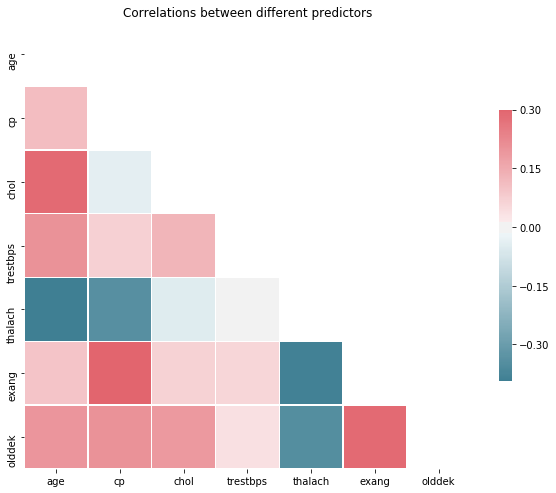

In [172]:
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_X, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()


In [173]:
X_enc_STD.shape

(297, 24)

In [174]:
X_enc_STD.tail()

,age,cp,chol,trestbps,thalach,exang,olddek,sex_0.0,sex_1.0,fbs_0.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
292,-1.166872,0.873880,-1.223355,-0.969952,1.196384,-0.696419,-0.906712,0,1,1,...,0,0,1,1,0,0,0,0,1,0
293,0.050685,0.873880,2.724115,1.534384,-1.423371,1.435916,2.013854,0,1,1,...,1,0,0,0,0,1,0,0,0,1
294,-1.166872,-0.164289,-0.095506,-0.276443,1.283709,1.435916,-0.563116,1,0,1,...,0,1,0,1,0,0,0,1,0,0
295,0.050685,-1.202459,0.186456,0.051047,0.497783,-0.696419,0.295874,0,1,1,...,1,0,0,1,0,0,0,1,0,0
296,-0.281376,-1.202459,-0.208291,-0.815839,1.502022,-0.696419,-0.906712,0,1,0,...,0,1,0,0,0,1,0,0,1,0


**SECOND SPLIT: Training, Test and Validation**

In [175]:
#SPLITTING DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_enc_STD, Y, test_size = 0.20)

In [176]:
X_train.shape

(237, 24)

In [177]:
partial_train_data = X_train[:200] #taking 300 rows
partial_train_targets = y_train[:200]
#Validation set
val_data = X_train[200:]
val_targets = y_train[200:]

TRANSFORMATION USING NUMPY

In [178]:
partial_train_data.values
partial_train_targets.values
val_data.values
val_targets.values 

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [179]:
#checking the balance of the data

Balance = partial_train_targets.value_counts()
category = ['1', '0']
partial_train_targets.value_counts()

0    108
1     92
Name: num, dtype: int64

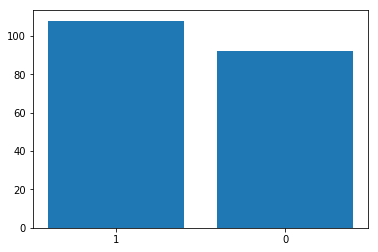

In [180]:
plt.bar(category, Balance)
#plt.xticks(category, objects)
plt.show()

Since the training set is highly unbalanced we could expect a baseline/threshold 
for the classifier of 54%

In [99]:
(109)/(109+91) # THRESHOLD

0.545

In [181]:
partial_train_data.shape[1] #columns

24

NEURAL NETWORK 1: several layers

In [182]:
# The actual NN
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(5, input_shape=(partial_train_data.shape[1],), activation='relu'),
  tf.keras.layers.Dense(10, activation='elu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(16, activation='elu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='elu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [183]:
model.compile(optimizer= 'rmsprop', # 'adam',
              loss= 'binary_crossentropy',#'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [184]:
history = model.fit(partial_train_data, partial_train_targets,
                    epochs=150, batch_size=20, verbose=0,
                    validation_data = (val_data, val_targets))

In [185]:
# Plot the training + validation loss and mean absolute error
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


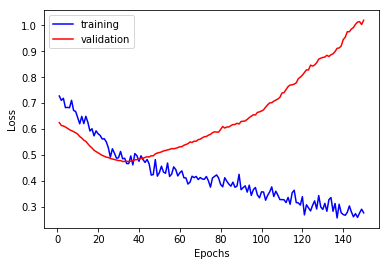

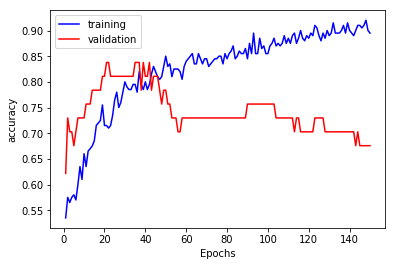

In [187]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accu = history.history['acc']
val_accu = history.history['val_acc']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training', 'validation'])
plt.show()

plt.plot(time, accu, 'b-')
plt.plot(time, val_accu, 'r-')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'])
plt.show()



Problems with overfitting

In [188]:
# Test the model with new unseen data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

60/60 [==============================] - 0s 139us/sample - loss: 1.1194 - acc: 0.7000


In [189]:
test_accuracy

0.7

In [190]:
test_loss

1.1194021145502726

In [211]:
# Taking a look at test data predictions versus true targets

results = model.predict(X_test) # Probability
res = model.predict_classes(X_test) # The actual


y_test = y_test.values
TRUEs = np.arange(len(y_test))
for i in range(len(res)):
   TRUEs[i] = np.array(y_test[i] + res[i])

In [213]:
import collections
collections.Counter(TRUEs)

Counter({0: 25, 1: 18, 2: 17})

In [214]:
TRUEs

array([0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 1, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2])

In [215]:
cm2 = confusion_matrix(y_test, res)
print("Confusion matrix:\n",cm2)


Confusion matrix:
 [[25  6]
 [12 17]]


In [216]:
accuracy_2 = (cm2[0][0]+cm2[1][1])/(cm2[0][0]+cm2[1][1]+cm2[0][1]+cm2[1][0])
print("Accuracy calculated from the training set = %.3f" % (accuracy_2))

print(classification_report(y_test, res, target_names=['0', '1']))

Accuracy calculated from the training set = 0.700
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        31
           1       0.74      0.59      0.65        29

   micro avg       0.70      0.70      0.70        60
   macro avg       0.71      0.70      0.69        60
weighted avg       0.71      0.70      0.70        60



Ok same value calculated by the neural network!

In [217]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [218]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))

In [219]:
logit_roc_auc

0.6863181312569522

In [134]:
Probabilities = model.predict(X_test)

In [135]:
Probabilities2 = model.predict_proba(X_test)

In [147]:
model.predict_proba(X_test)[:,1]

IndexError: index 1 is out of bounds for axis 1 with size 1

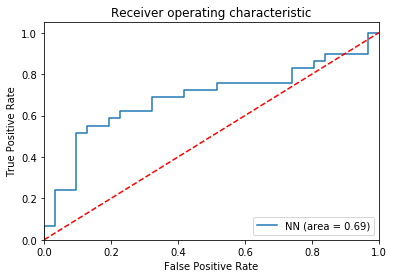

In [220]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test))
plt.figure()
plt.plot(fpr, tpr, label='NN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
Originally we had 68% from the nn, and now we have a 77%,
so we improved the estimation in 9%

# Trying small model

In [221]:
model_small = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, input_shape=(partial_train_data.shape[1],), activation='relu'),
  #tf.keras.layers.Dense(10, activation='elu'),
  #tf.keras.layers.Dropout(0.1),
  #tf.keras.layers.Dense(16, activation='elu'),
  #tf.keras.layers.Dropout(0.5),
  #tf.keras.layers.Dense(10, activation='elu'),
  #tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [222]:
model_small.compile(optimizer= 'adam', # 'using ADAM
                    #learning_rate = 0.01,
              loss= 'binary_crossentropy',#'sparse_categorical_crossentropy',
              metrics=['accuracy'])


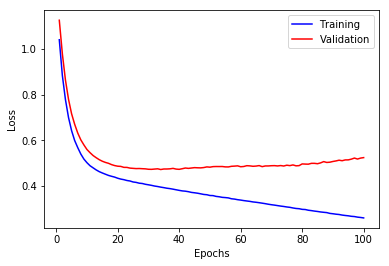

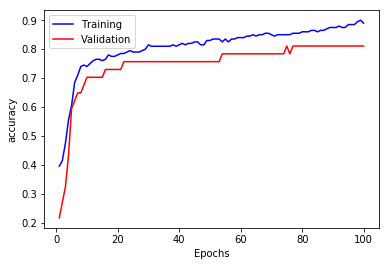

In [223]:
loss = history_small.history['loss']
val_loss = history_small.history['val_loss']
accu = history_small.history['acc']
val_accu = history_small.history['val_acc']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

plt.plot(time, accu, 'b-')
plt.plot(time, val_accu, 'r-')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training', 'Validation'])
plt.show()



In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [58]:
#Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [228]:
# Check other NN architechtures, using: 1. regularization and other dropouts (2 more networks)
# until graps of training validation